In [67]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#data=pd.read_csv("C:\\Users\\Utsav\\Desktop\\Mxene\\ML_exp", sep=',',header=0)

url = "https://raw.githubusercontent.com/UtsavMurarka/MXene-machine-learning/master/data_new.csv"

data=pd.read_csv(url, sep=',',header=0)
data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,band gap,label
0,3.261006,0.0,0.0,-1.630503,2.824114,0.0,0.000000e+00,1.000000e-16,32.77823,0.333333,0.666667,0.382597,0.666667,0.333333,0.219565,0.000000,0.000000,0.301081,0.333333,0.666667,0.274615,0.666667,0.333333,0.327546,24.0,24.0,6.0,35.0,35.0,0.000,0
1,3.128723,0.0,0.0,-1.564361,2.709553,0.0,0.000000e+00,-2.000000e-16,35.60857,0.333333,0.666667,0.374045,0.000000,0.000000,0.296135,0.333333,0.666667,0.269526,0.666667,0.333333,0.322062,0.666667,0.333333,0.243635,24.0,24.0,6.0,35.0,1.0,0.000,0
2,3.242942,0.0,0.0,-1.621471,2.808470,0.0,1.000000e-16,-2.000000e-16,33.14441,0.666667,0.333333,0.219954,0.000000,0.000000,0.301989,0.333333,0.666667,0.379072,0.333333,0.666667,0.273958,0.666667,0.333333,0.330431,24.0,24.0,6.0,17.0,35.0,0.000,0
3,3.175536,0.0,0.0,-1.587768,2.750095,0.0,0.000000e+00,-1.000000e-16,34.56644,0.000000,0.000000,0.301081,0.333333,0.666667,0.375717,0.666667,0.333333,0.226444,0.333333,0.666667,0.274360,0.666667,0.333333,0.327801,24.0,24.0,6.0,17.0,17.0,0.000,0
4,3.095383,0.0,0.0,-1.547692,2.680681,0.0,0.000000e+00,2.000000e-16,36.37976,0.000000,0.000000,0.297156,0.333333,0.666667,0.369466,0.333333,0.666667,0.270359,0.666667,0.333333,0.323307,0.666667,0.333333,0.245114,24.0,24.0,6.0,17.0,1.0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,3.336980,0.0,0.0,-1.668490,2.889910,0.0,1.000000e-16,3.000000e-16,31.30267,0.666667,0.333333,0.202090,0.000000,0.000000,0.308344,0.333333,0.666667,0.379861,0.333333,0.666667,0.265960,0.666667,0.333333,0.349148,40.0,40.0,7.0,8.0,35.0,0.000,0
3075,3.307383,0.0,0.0,-1.653691,2.864278,0.0,0.000000e+00,0.000000e+00,31.86542,0.666667,0.333333,0.207793,0.000000,0.000000,0.306937,0.333333,0.666667,0.377970,0.333333,0.666667,0.265295,0.666667,0.333333,0.347409,40.0,40.0,7.0,8.0,17.0,0.000,0
3076,3.313626,0.0,0.0,-1.656813,2.869684,0.0,0.000000e+00,1.000000e-16,31.74547,0.666667,0.333333,0.220976,0.000000,0.000000,0.302371,0.333333,0.666667,0.374780,0.333333,0.666667,0.263247,0.666667,0.333333,0.344028,40.0,40.0,7.0,8.0,9.0,0.000,0
3077,3.259244,0.0,0.0,-1.629622,2.822588,0.0,-1.000000e-16,-1.000000e-16,32.81367,0.666667,0.333333,0.230736,0.000000,0.000000,0.301379,0.333333,0.666667,0.371571,0.333333,0.666667,0.260520,0.666667,0.333333,0.341197,40.0,40.0,7.0,8.0,1.0,0.156,1


In [0]:
mxene=data.values
mxene=np.array(mxene)

In [0]:
#split the data

train, test = train_test_split(data, test_size=0.2)
train=np.array(train)
test=np.array(test)

In [70]:
NegativeCount=0
PositiveCount=0
for i in range(len(train)):
    if train[i][30]==0 :
        NegativeCount=NegativeCount+1
    if train[i][30]==1:
        PositiveCount=PositiveCount+1
print(NegativeCount)
print(PositiveCount)
print(PositiveCount+NegativeCount)

2152
311
2463


In [71]:
positives=np.zeros((PositiveCount,31))
negatives=np.zeros((NegativeCount,31))
    
j=0
k=0
    
for i in range(len(train)):

    if(train[i,30] == 1):
        positives[j,:] = train[i,:]
        j=j+1
    if(train[i,30] == 0):
        negatives[k,:] = train[i,:]
        k=k+1

print(np.shape(train))
print(np.shape(test))

(2463, 31)
(616, 31)


In [0]:
y_train=np.zeros(len(train))
y_test=np.zeros(len(test))

In [73]:
for i in range(len(test)):
    y_test[i]=test[i][30]
    test[i][30]=1

for i in range(len(train)):
    y_train[i]=train[i][30]
    train[i][30]=1

train = np.delete(train, 30, 1)
test = np.delete(test, 30, 1)

train = np.delete(train, 29, 1)
test = np.delete(test, 29, 1)

print(np.shape(train))
print(np.shape(test))


positives = sum(y_train)
negatives = len(y_train) - positives

print("test")
print("positives = %d \n negatives = %d" % (positives, negatives))

positives = sum(y_test)
negatives = len(y_test) - positives

print("train")
print("positives = %d \n negatives = %d" % (positives, negatives))

print(train)


(2463, 29)
(616, 29)
test
positives = 311 
 negatives = 2152
train
positives = 82 
 negatives = 534
[[ 3.179014  0.        0.       ...  6.        8.       17.      ]
 [ 3.165752  0.        0.       ...  6.       17.        1.      ]
 [ 3.306984  0.        0.       ...  7.        8.        1.      ]
 ...
 [ 3.450685  0.        0.       ...  6.        8.       35.      ]
 [ 3.288001  0.        0.       ...  6.        8.        1.      ]
 [ 3.336984  0.        0.       ...  6.        8.        1.      ]]


# **Principal Component Analysis**

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=10)

In [0]:
train_reduced = pca.fit_transform(train)

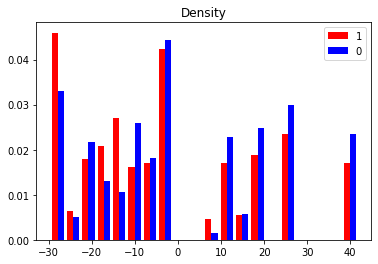

Mean for positive data =  -3.356360068074351
Mean for negative data =  0.48505017712412407


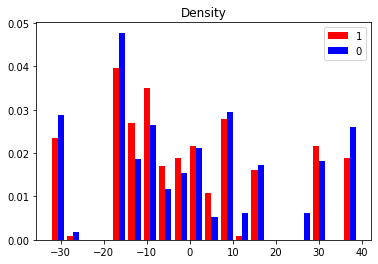

Mean for positive data =  -1.0138906354332213
Mean for negative data =  0.1465241578158601


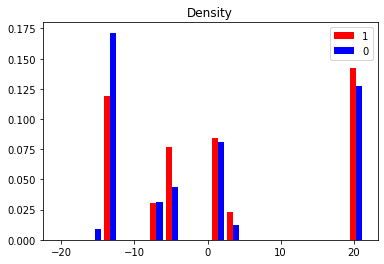

Mean for positive data =  1.8718414665750214
Mean for negative data =  -0.2705124052531735


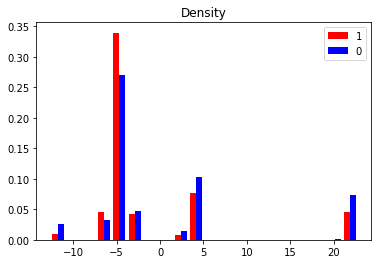

Mean for positive data =  -1.4714290135529209
Mean for negative data =  0.21264610744189621


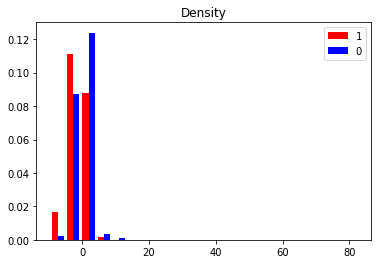

Mean for positive data =  -1.1443155356314918
Mean for negative data =  0.16537273772368716


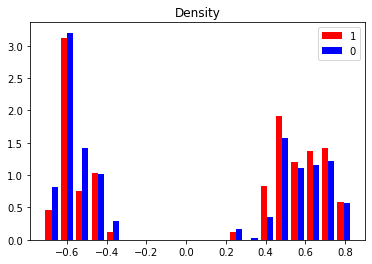

Mean for positive data =  0.09163039319607062
Mean for negative data =  -0.013242124667275784


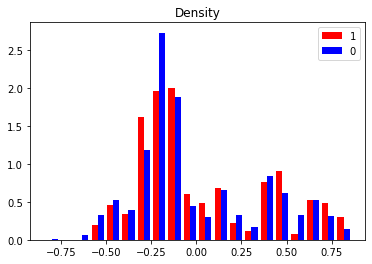

Mean for positive data =  0.02851398740213098
Mean for negative data =  -0.004120748179397115


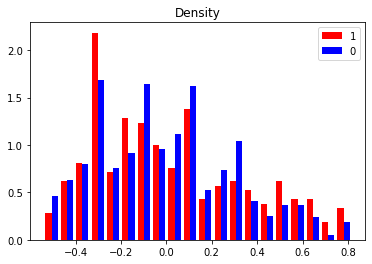

Mean for positive data =  0.017742835106641437
Mean for negative data =  -0.0025641364861364473


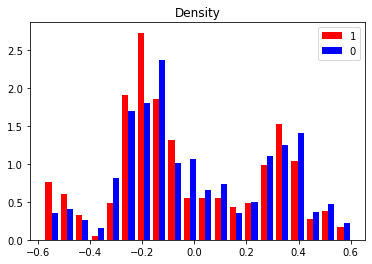

Mean for positive data =  -0.0312737426500445
Mean for negative data =  0.004519578979630007


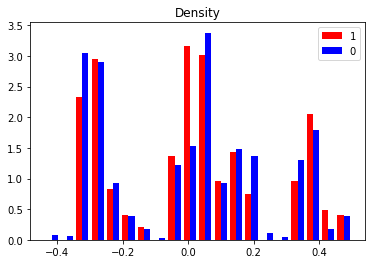

Mean for positive data =  0.01098905028151297
Mean for negative data =  -0.001588101597374799


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
C1,1,3e-16,-6.4e-18,-1.3e-19,3.1e-17,-3.3e-17,-2.4e-17,2.1e-17,-1.7e-17,-3.3e-17
C2,3e-16,1,-1.1e-16,-1.2e-17,7e-18,-2.3e-17,7.8e-18,-1.2e-17,2.6e-18,8.7e-18
C3,-6.4e-18,-1.1e-16,1,2.2e-17,1.5e-17,1.4e-17,2.1e-17,6.5e-19,-1.7e-17,3.1e-17
C4,-1.3e-19,-1.2e-17,2.2e-17,1,2.9e-18,2.4e-17,-6.7e-19,1.5e-17,-4.9e-17,-1.6e-17
C5,3.1e-17,7e-18,1.5e-17,2.9e-18,1,1e-17,4.7e-17,-9.5e-18,-2.9e-17,1.9e-17
C6,-3.3e-17,-2.3e-17,1.4e-17,2.4e-17,1e-17,1,3.1e-17,-4.2e-17,-4.3e-17,1.1e-17
C7,-2.4e-17,7.8e-18,2.1e-17,-6.7e-19,4.7e-17,3.1e-17,1,-3.5e-16,-3.6e-16,2e-16
C8,2.1e-17,-1.2e-17,6.5e-19,1.5e-17,-9.5e-18,-4.2e-17,-3.5e-16,1,1.4e-15,-6.5e-17
C9,-1.7e-17,2.6e-18,-1.7e-17,-4.9e-17,-2.9e-17,-4.3e-17,-3.6e-16,1.4e-15,1,1.5e-16
C10,-3.3e-17,8.7e-18,3.1e-17,-1.6e-17,1.9e-17,1.1e-17,2e-16,-6.5e-17,1.5e-16,1


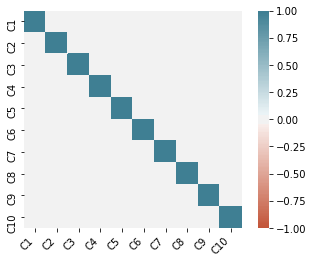

In [77]:
import seaborn as sns


#Plot histograms
positives=np.zeros((PositiveCount,10))
negatives=np.zeros((NegativeCount,10))
    
j=0
k=0
    
for i in range(len(train)):

    if(y_train[i] == 1):
        positives[j,:] = train_reduced[i,:]
        j=j+1
    if(y_train[i] == 0):
        negatives[k,:] = train_reduced[i,:]
        k=k+1


def plot(ind):
  bins=20
  clr=['r', 'b']
  lbl=['1', '0']
  x=[positives[:,ind], negatives[:,ind]]
  plt.hist(x, bins, density=True, color=clr, label=lbl)
  plt.legend(loc='upper right')
  plt.title('Density')
  plt.show()
  print("Mean for positive data = ", np.mean(positives[:,ind]))
  print("Mean for negative data = ", np.mean(negatives[:,ind]))

for i in range(10):
  plot(i)


  
dataset = pd.DataFrame({'C1': train_reduced[:, 0],
                        'C2': train_reduced[:, 1],
                        'C3': train_reduced[:, 2],
                        'C4': train_reduced[:, 3],
                        'C5': train_reduced[:, 4],
                        'C6': train_reduced[:, 5],
                        'C7': train_reduced[:, 6],
                        'C8': train_reduced[:, 7],
                        'C9': train_reduced[:, 8],
                        'C10': train_reduced[:, 9]})
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation Heatmap")\
    .set_precision(2)\

In [78]:
print(np.shape(train))
print(np.shape(train_reduced))

(2463, 29)
(2463, 10)


In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
naiveBayes = gnb.fit(train, y_train)
y_pred = naiveBayes.predict(test)

In [80]:
print("Accuracy = " + str(100*accuracy_score(y_test, y_pred)) + "%")

Accuracy = 76.94805194805194%


In [0]:
test_reduced = pca.fit_transform(test)
gnb = GaussianNB()
naiveBayes = gnb.fit(train_reduced, y_train)
y_pred = naiveBayes.predict(test_reduced)

In [82]:
print("Accuracy = " + str(100*accuracy_score(y_test, y_pred)) + "%")

Accuracy = 86.68831168831169%


## **Neighborhood Component Analysis**

In [0]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

In [0]:
nca = NeighborhoodComponentsAnalysis(n_components=10)
train_reduced_nca = nca.fit_transform(train, y_train)

In [46]:
print(np.shape(train))
print(np.shape(train_reduced_nca))

(2463, 29)
(2463, 10)


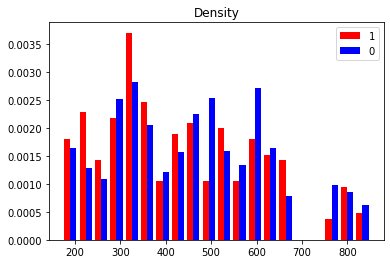

Mean for positive data =  430.83143652104496
Mean for negative data =  455.237523355687


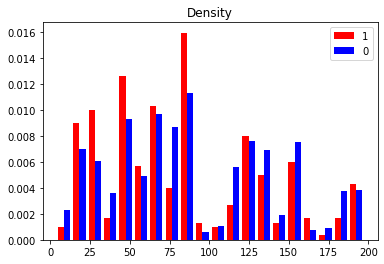

Mean for positive data =  83.16722386293281
Mean for negative data =  89.86432464130162


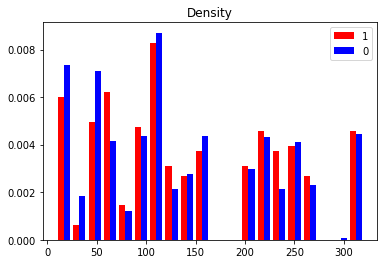

Mean for positive data =  143.69691830695606
Mean for negative data =  135.48731436746633


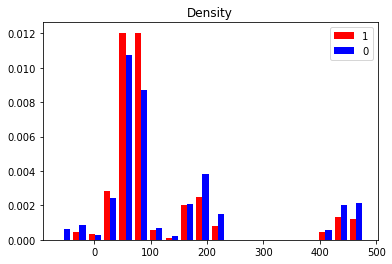

Mean for positive data =  112.31498231261162
Mean for negative data =  135.01857841529795


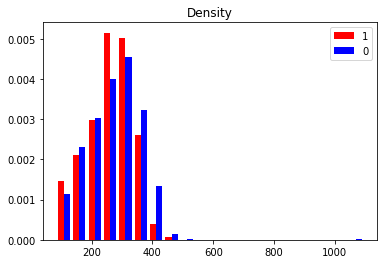

Mean for positive data =  260.52131120049876
Mean for negative data =  272.989636537475


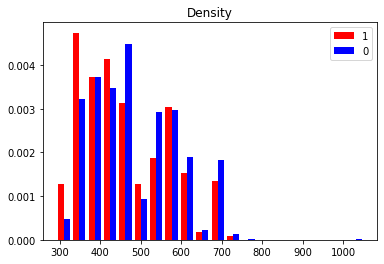

Mean for positive data =  460.2406056813694
Mean for negative data =  482.9276402597032


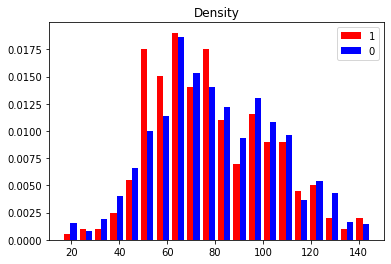

Mean for positive data =  78.27101951595493
Mean for negative data =  80.12794809587425


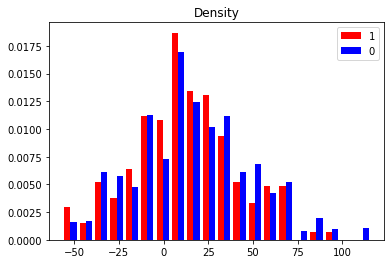

Mean for positive data =  12.25506071979942
Mean for negative data =  16.413340198131507


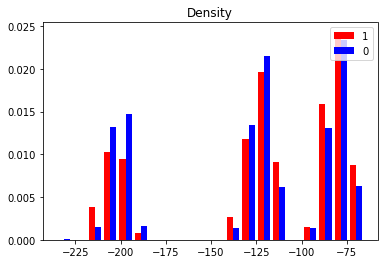

Mean for positive data =  -120.95842857450629
Mean for negative data =  -127.50328777005487


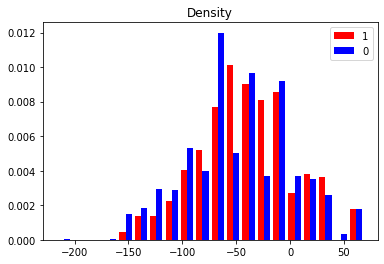

Mean for positive data =  -41.02323179695529
Mean for negative data =  -47.601226853694044


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
C1,1,0.93,0.45,-0.16,-0.55,0.94,0.9,-0.075,-0.7,0.044
C2,0.93,1,0.2,-0.23,-0.26,0.98,0.91,-0.32,-0.42,-0.31
C3,0.45,0.2,1,-0.086,-0.66,0.28,0.48,-0.12,-0.44,0.62
C4,-0.16,-0.23,-0.086,1,0.2,-0.2,-0.47,0.5,0.047,-0.022
C5,-0.55,-0.26,-0.66,0.2,1,-0.26,-0.39,-0.38,0.85,-0.81
C6,0.94,0.98,0.28,-0.2,-0.26,1,0.93,-0.29,-0.48,-0.26
C7,0.9,0.91,0.48,-0.47,-0.39,0.93,1,-0.46,-0.45,-0.096
C8,-0.075,-0.32,-0.12,0.5,-0.38,-0.29,-0.46,1,-0.56,0.56
C9,-0.7,-0.42,-0.44,0.047,0.85,-0.48,-0.45,-0.56,1,-0.63
C10,0.044,-0.31,0.62,-0.022,-0.81,-0.26,-0.096,0.56,-0.63,1


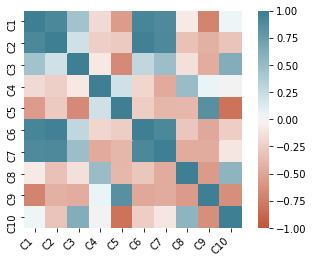

In [85]:
import seaborn as sns
#Plot histograms
positives=np.zeros((PositiveCount,10))
negatives=np.zeros((NegativeCount,10))
j=0
k=0
    
for i in range(len(train)):

    if(y_train[i] == 1):
        positives[j,:] = train_reduced_nca[i,:]
        j=j+1
    if(y_train[i] == 0):
        negatives[k,:] = train_reduced_nca[i,:]
        k=k+1


def plot(ind):
  bins=20
  clr=['r', 'b']
  lbl=['1', '0']
  x=[positives[:,ind], negatives[:,ind]]
  plt.hist(x, bins, density=True, color=clr, label=lbl)
  plt.legend(loc='upper right')
  plt.title('Density')
  plt.show()
  print("Mean for positive data = ", np.mean(positives[:,ind]))
  print("Mean for negative data = ", np.mean(negatives[:,ind]))

for i in range(10):
  plot(i)


      
dataset = pd.DataFrame({'C1': train_reduced_nca[:, 0],
                        'C2': train_reduced_nca[:, 1],
                        'C3': train_reduced_nca[:, 2],
                        'C4': train_reduced_nca[:, 3],
                        'C5': train_reduced_nca[:, 4],
                        'C6': train_reduced_nca[:, 5],
                        'C7': train_reduced_nca[:, 6],
                        'C8': train_reduced_nca[:, 7],
                        'C9': train_reduced_nca[:, 8],
                        'C10': train_reduced_nca[:, 9]})
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Correlation Heatmap")\
    .set_precision(2)\

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
naiveBayes = gnb.fit(train, y_train)
y_pred = naiveBayes.predict(test)

In [87]:
print("Accuracy = " + str(100*accuracy_score(y_test, y_pred)) + "%")

Accuracy = 76.94805194805194%


In [0]:
test_reduced_nca = nca.transform(test)
gnb = GaussianNB()
naiveBayes = gnb.fit(train_reduced_nca, y_train)
y_pred = naiveBayes.predict(test_reduced_nca)

In [89]:
print("Accuracy = " + str(100*accuracy_score(y_test, y_pred)) + "%")

Accuracy = 86.68831168831169%
